In [119]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from datetime import datetime
now = datetime.now()

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Reading pre-processed Dataset

We have pre-processed the dataset as part of EDA during the last assignment

In [120]:
customer_data = pd.read_csv("../Dataset/marketing_campaign_eng.csv", index_col='ID', infer_datetime_format=True)

In [122]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3873.586824,1,0,0,2252
2174,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3027.586824,1,2,0,38
4141,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3374.586824,2,0,0,1202
6182,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2967.586824,2,1,0,64
5324,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3223.586824,2,1,0,595


In [123]:
customer_data.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [124]:
# Changing object data type to categorical
customer_data['Education'] = pd.Categorical(customer_data.Education)

In [125]:
#Education column has 5 unique values
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [126]:
#Converting all categorical to numeric using cat codes
cat_columns = customer_data.select_dtypes(['category']).columns
customer_data[cat_columns] = customer_data[cat_columns].apply(lambda x: x.cat.codes)

In [127]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3873.586824,1,0,0,2252
2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3027.586824,1,2,0,38
4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3374.586824,2,0,0,1202
6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2967.586824,2,1,0,64
5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3223.586824,2,1,0,595


In [128]:
customer_data.dtypes

Education                 int8
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [129]:
print("['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]\n")
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]

[2 4 3 1 0]
2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64


# Clustering
## KMeans

In [130]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer

We have a total of 24 attributes, we will use Elbow Method to determine the number of clusters to be formed.

We will be using KMeans mode for the elbow method and and start k parameter at k = 12

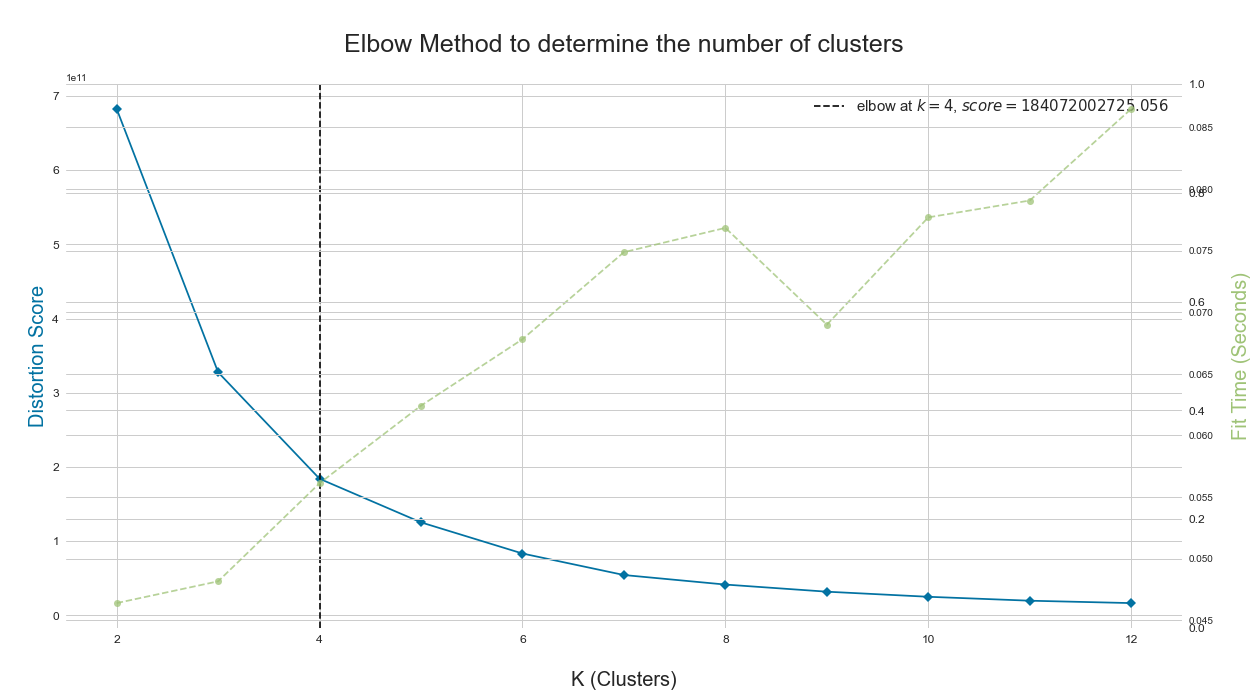

In [131]:
_, axes = plt.subplots(figsize = (20, 10))
Elbow_Km = KElbowVisualizer(KMeans(), k = 12, locate_elbow = True)
Elbow_Km.fit(customer_data)

axes.set_title("\nElbow Method to determine the number of clusters\n", fontsize = 25)
axes2 = axes.twinx()

axes.set_xlabel("\nK (Clusters)", fontsize = 20)
axes.set_ylabel("\nDistortion Score", fontsize = 20, color = 'b')
axes2.set_ylabel("\nFit Time (Seconds)", fontsize = 20, color = 'g')
axes.tick_params(axis = 'x', labelsize = 12)
axes.tick_params(axis = 'y', labelsize = 12)
axes2.tick_params(axis = 'y', labelsize = 12)

axes.legend(fontsize = 15).set_visible(True)

sns.despine(left = True, bottom = True)
plt.show()


**Insights from the above Elbow Method:**

1. We will use k = 4, thus there will be four clusters in our dataset.
2. We will use KMeans Algorithm for clustering.

In [132]:
Km = KMeans(n_clusters = 4, random_state = 36)

y_km = Km.fit_predict(customer_data)
customer_data["Clusters"] = y_km

### Cluster Analysis

In [153]:
color_palette = ["#EB4949","#C36CF6", "#039B45","#085EC1"]

#### Total Item Spending X Income

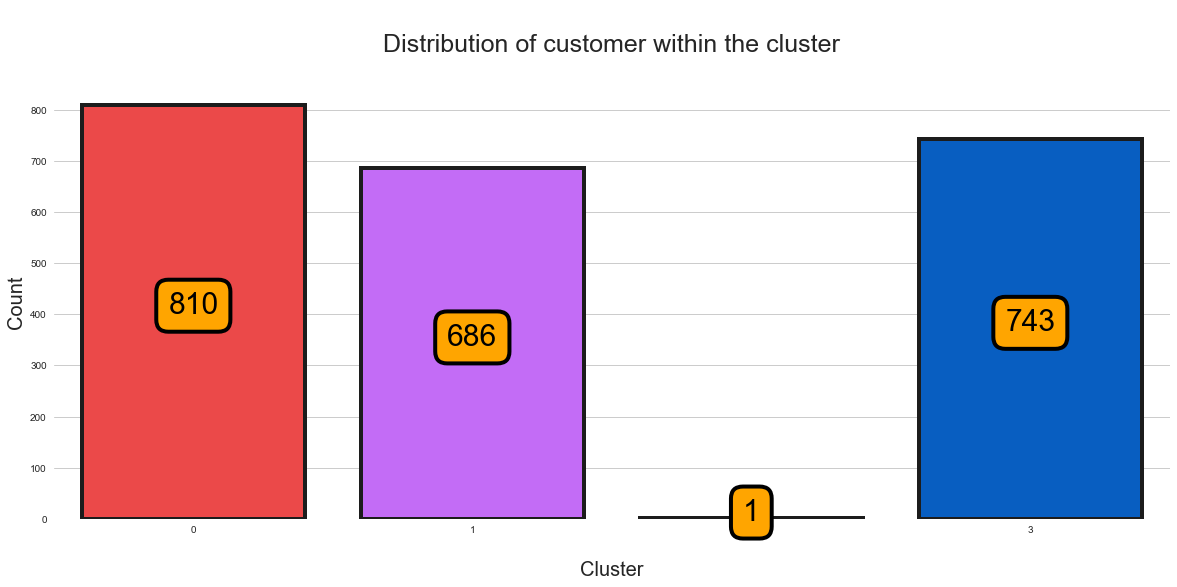

In [155]:
plt.subplots(figsize = (20, 8))
p = sns.countplot(x = customer_data["Clusters"], palette = color_palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nDistribution of customer within the cluster\n", fontsize = 25)
p.axes.set_ylabel("Count", fontsize = 20)
p.axes.set_xlabel("\nCluster", fontsize = 20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6, size = 30, color = "black", rotation=0, bbox={"boxstyle" : "round", "pad" : 0.4, "facecolor" : "orange", "edgecolor" : "black", "linewidth" : 4, "alpha" : 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights from the cluster distribution:**

* Cluster 1: 810 Customers
* Cluster 2: 686 Customers
* Cluster 3: 1 Customer
* Cluster 4: 743 Customers


1. By chooosing number of centroids as 4 for the cluster analysis, we seemed to have identified a certain customer which is an outlier. We will investigate what causes this customer to be an outlier further down the notebook.
2. The rest of the cluster seem to have an almost uniform distribution, we will analyse what makes these cluster differernt from each other. 

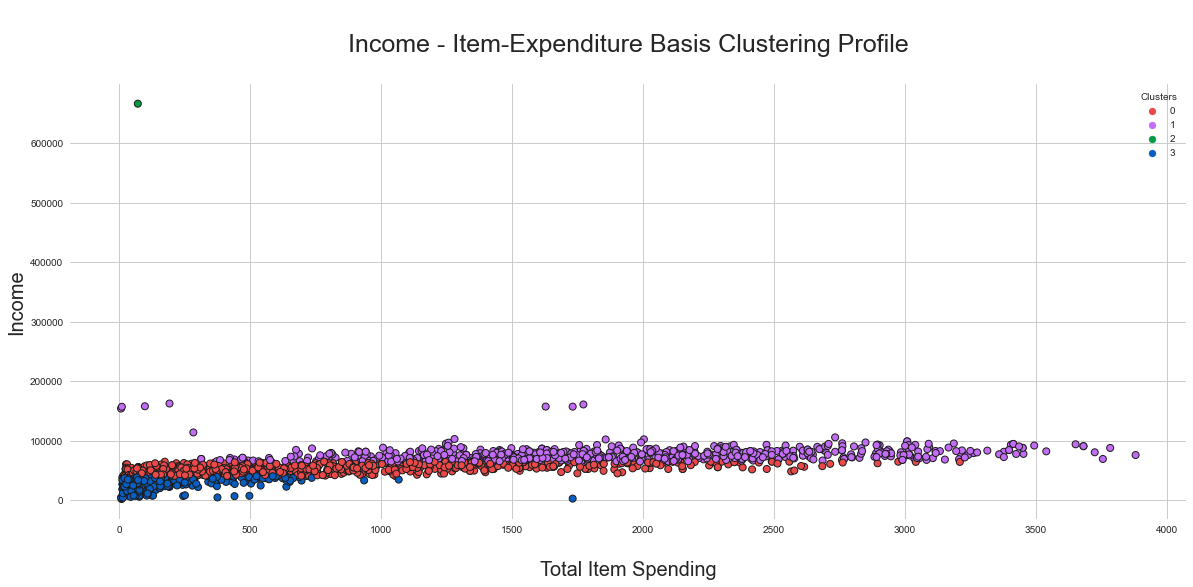

In [156]:
_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x = customer_data["Itm_Total"], y = customer_data["Income"], hue = customer_data["Clusters"], palette = color_palette, sizes = 60, alpha=1, edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome - Item-Expenditure Basis Clustering Profile\n", fontsize=25)
axes.set_ylabel("Income", fontsize=20)
axes.set_xlabel("\nTotal Item Spending", fontsize=20)

sns.despine(left = True, bottom = True)
plt.show()

**Inight from the above distribution**

1. We can see within cluster 2, the customer seems to have very high income causing the customer to become an OUTLIER within the customer base.

**Treatment**

* We will now go ahead and remove the customer with that highest income and redo Kmeans after outlier treatment.

In [136]:
#Seeing the Income column data distribution. Note: max is very high the mean and standard deviation
customer_data.Income.describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [137]:
#Getting Id of the customer in cluster 2
outlier_id = customer_data.index[customer_data['Clusters'] == 2].tolist()[0]

In [138]:
#dropping the customer
customer_data_treatment = customer_data.drop(outlier_id)

In [139]:
#Now the max is comparable to the mean and standard deviation
customer_data_treatment.Income.describe()

count      2239.000000
mean      51972.834762
std       21410.605416
min        1730.000000
25%       35533.500000
50%       51717.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

## KMeans post Outlier Treatment

In [140]:
Km = KMeans(n_clusters = 4, random_state = 36)

y_km = Km.fit_predict(customer_data_treatment)
customer_data_treatment["Clusters"] = y_km

### Cluster Analysis

In [141]:
color_palette = ["#EB4949","#C36CF6", "#D6F66C","#98F9F6"]

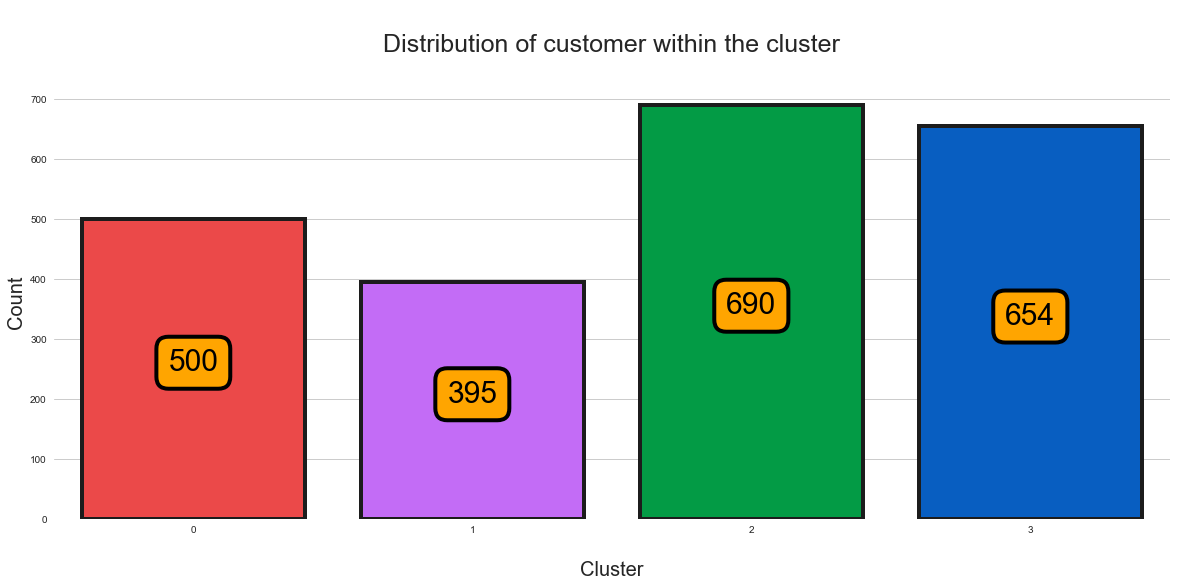

In [157]:
plt.subplots(figsize = (20, 8))
p = sns.countplot(x = customer_data_treatment["Clusters"], palette = color_palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nDistribution of customer within the cluster\n", fontsize = 25)
p.axes.set_ylabel("Count", fontsize = 20)
p.axes.set_xlabel("\nCluster", fontsize = 20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6, size = 30, color = "black", rotation=0, bbox={"boxstyle" : "round", "pad" : 0.4, "facecolor" : "orange", "edgecolor" : "black", "linewidth" : 4, "alpha" : 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights from the cluster distribution:**

* Cluster 1: 500 Customers
* Cluster 2: 395 Customers
* Cluster 3: 690 Customers
* Cluster 4: 654 Customers

1. Post the outlier treament, all the clusters now seem to have an almost uniform distribution, we will analyse what makes these cluster differernt from each other.

#### Total Item Spending X Income

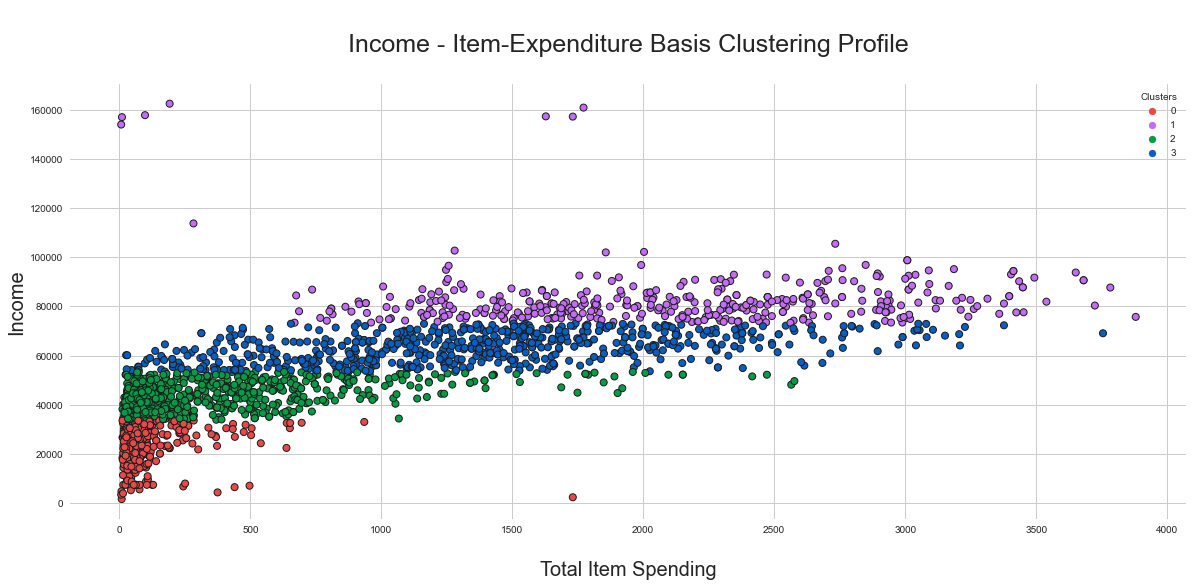

In [158]:
_, axes = plt.subplots(figsize = (20, 8))
sns.scatterplot(x = customer_data_treatment["Itm_Total"], y = customer_data_treatment["Income"], hue = customer_data_treatment["Clusters"], palette = color_palette, sizes = 60, alpha = 1, edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome - Item-Expenditure Basis Clustering Profile\n", fontsize = 25)
axes.set_ylabel("Income", fontsize = 20)
axes.set_xlabel("\nTotal Item Spending", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

1. Most of the cluster 0 customers income range is in between 1000 to 40000 and spending range is in between 0 to 800, with a few expected outliers.
2. Most of the cluster 1 customers income range is in between 70000 to 100000 and spending range is in between 1000 to 3200, with a few expected outlies.
3. Most of the cluster 2 customers income range is in between 30000 to 50000 and spending range is in between 0 to 1500, with a few expected outliers.
4. Most of the cluster 3 customers income range is in between 50000 to 70000 and spending range is in between 500 to 2500, with a few expected outliers.

**Why are there Outliers?**

* There are customer who either have low income but high expenditure or vice-versa causing them to become outliers in the clusters. Though the number of the outliers are little, threre can be valuable insights in them. As to how can we pull customers with high income into the company's market.

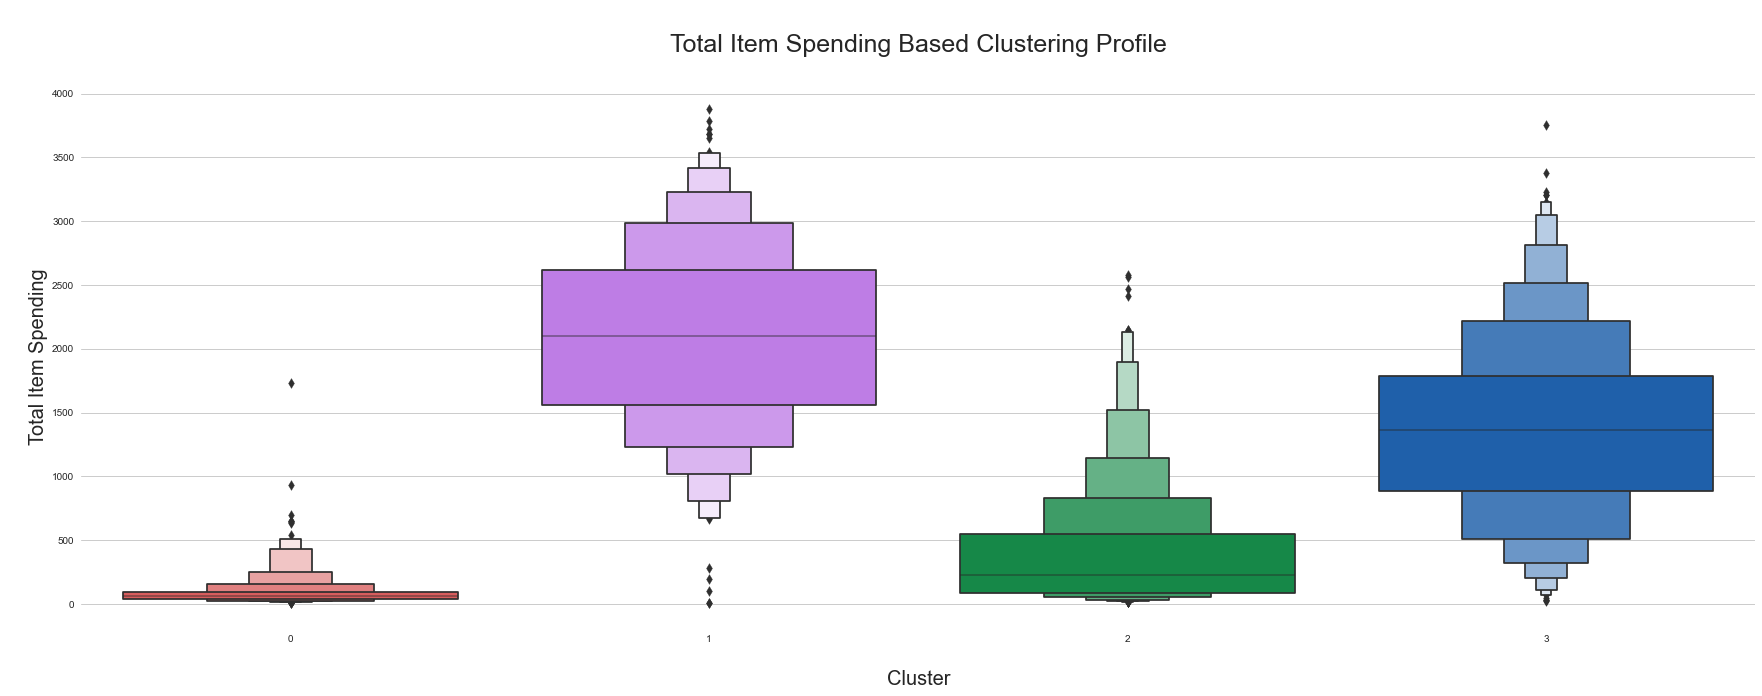

In [159]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data_treatment["Clusters"], y = customer_data_treatment["Itm_Total"], palette = color_palette)

axes.set_title("\nTotal Item Spending Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nTotal Item Spending", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers spending range is in between 0 to 800.
* Most of the cluster 1 customers spending range is in between 1000 to 3200.
* Most of the cluster 2 customers spending range is in between 0 to 1500.
* Most of the cluster 3 customers spending range is in between 500 to 2500.

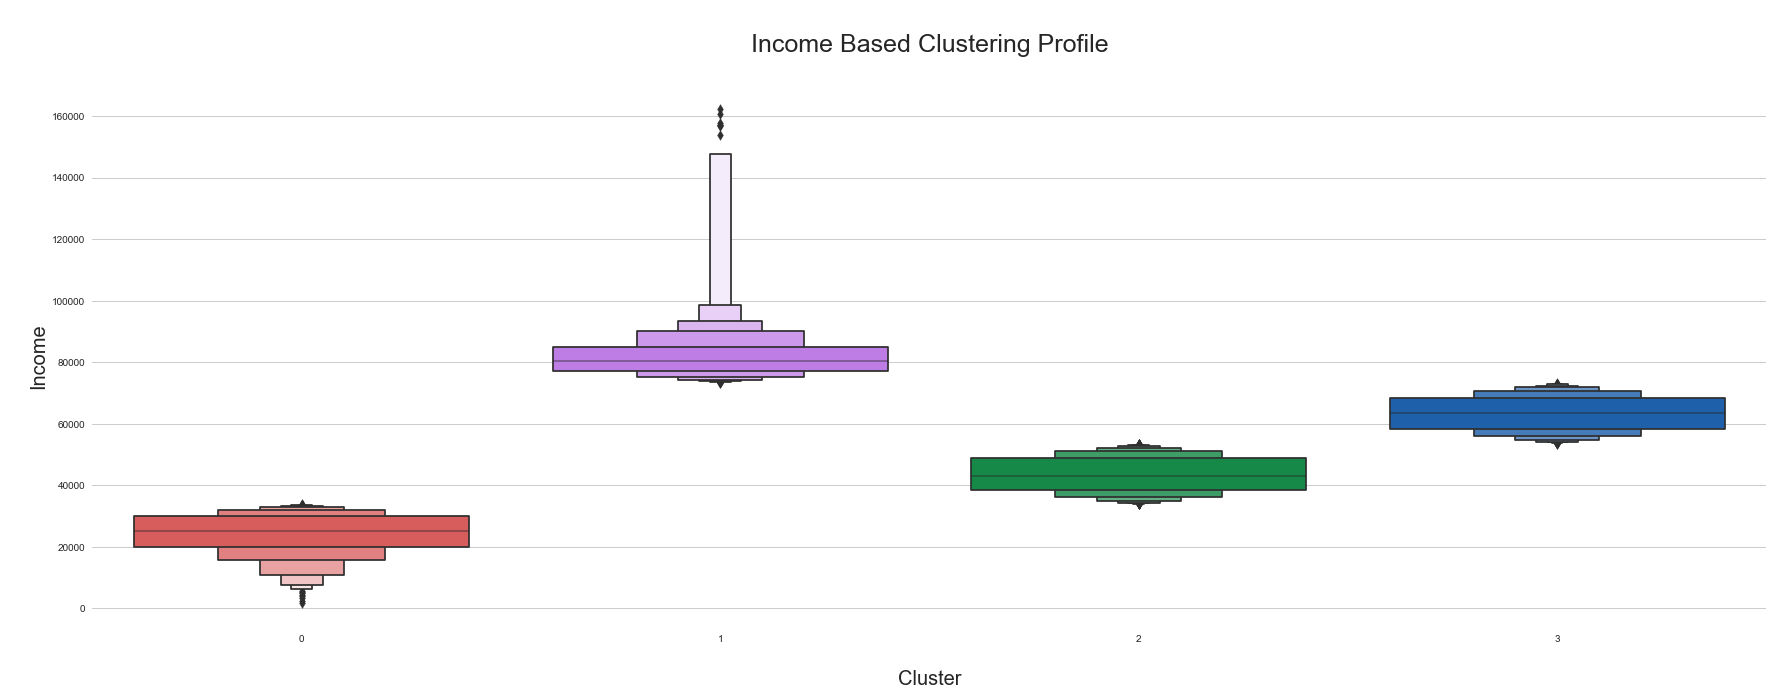

In [160]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data_treatment["Clusters"], y = customer_data_treatment["Income"], palette = color_palette)

axes.set_title("\nIncome Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nIncome", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers income range is in between 0 to 35000.
* Most of the cluster 1 customers spending range is in between 70000 to 150000.
* Most of the cluster 2 customers spending range is in between 35000 to 55000.
* Most of the cluster 3 customers spending range is in between 55000 to 70000.

#### Cluster profiling based on Total Item Spending X __
**We will analyse the customer by comparing total item spending and childern, age, education level, marital status, number of kids, days since joining.**

In [165]:
def density_cluster(parameter):
    _, axes = plt.subplots(figsize = (30, 12))
    sns.kdeplot(x = customer_data_treatment[parameter], y = customer_data_treatment["Itm_Total"], hue = customer_data_treatment["Clusters"], kind="kde", height = 10, palette = color_palette)
    axes.set_title(f"\nClustering Profile On {parameter}\n", fontsize = 25)
    axes.set_ylabel("Spending", fontsize = 20)
    axes.set_xlabel(f"\n{parameter}", fontsize = 20)
    
    sns.despine(left = True, bottom = True)
    plt.show()

##### total item spending X children

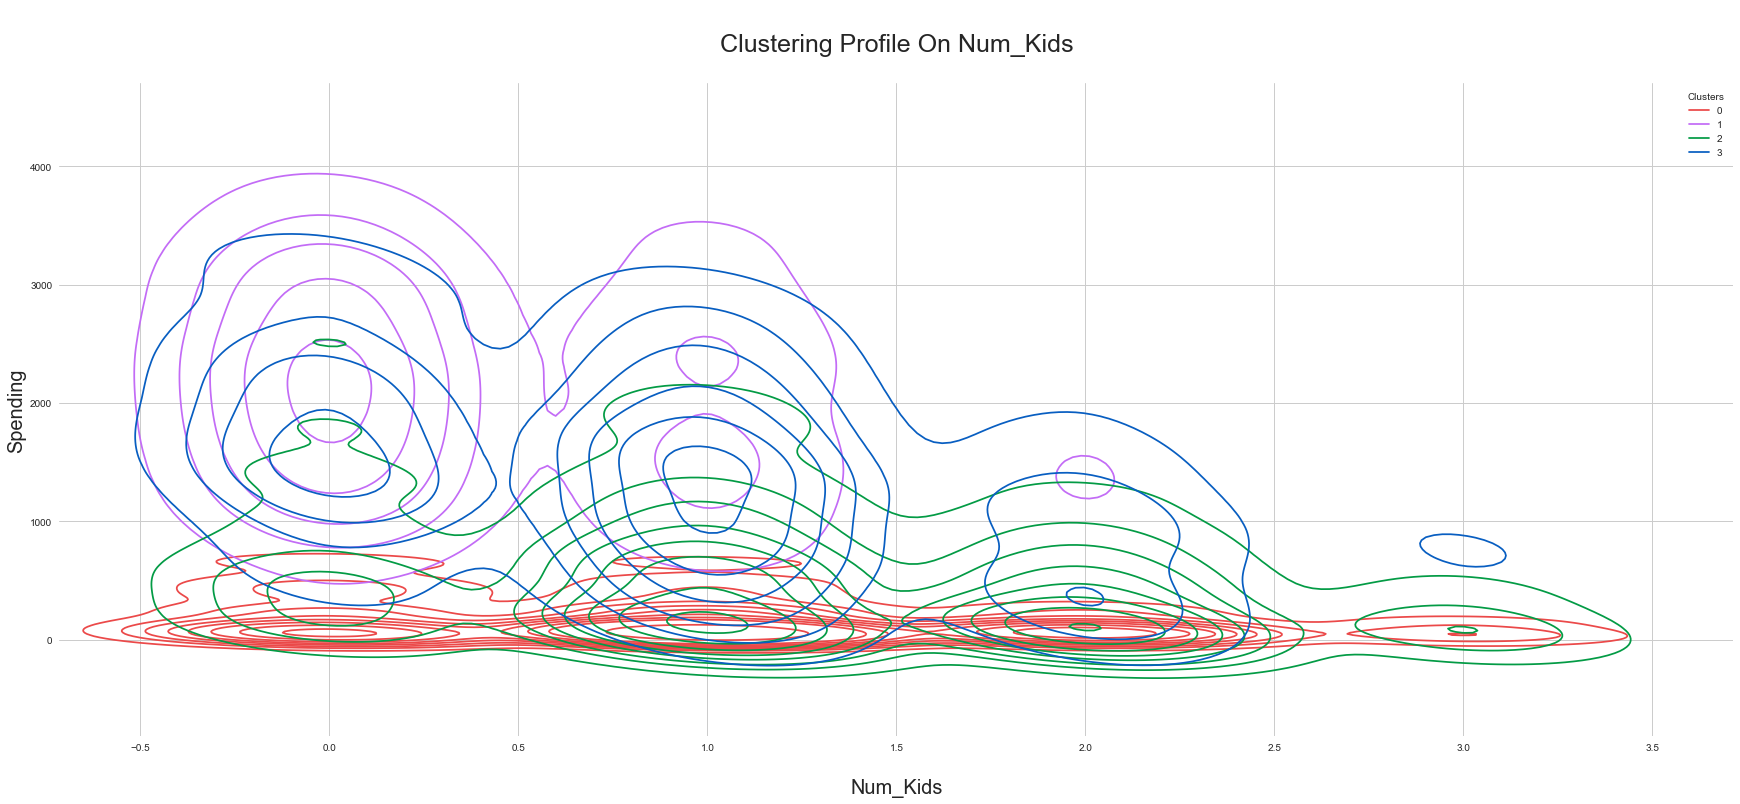

In [166]:
#cluster comparison of total item spending with total number of kids in the household
density_cluster("Num_Kids")

**Insights:**

* Most of the Customers of cluster 0 have at most one child, some have two and very few have three. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 don't have any child, only a few have one. Their spending range is in between 1000 to 3200.
* Most of the customers of cluster 2 have one child, some have two. Their spending range is in between 0 to 1500.
* Most of the customers of cluster 3 have two child, some have one and very few have three. Their spending range is in between 500 to 2500.

##### total item spending X Education Level

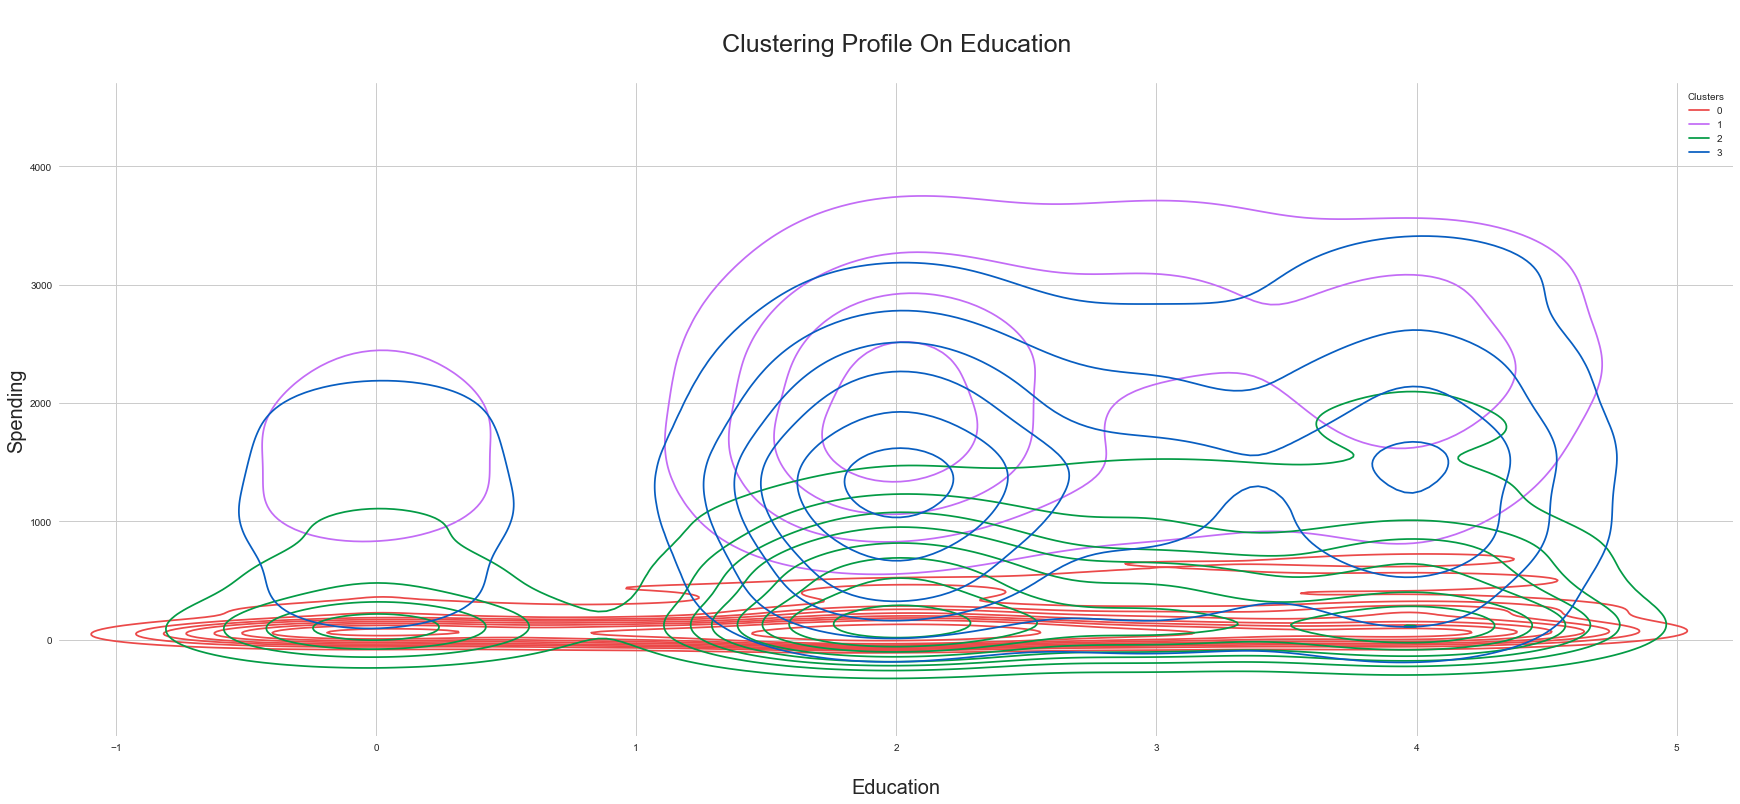

In [168]:
#cluster comparison of total item spending with the education level
density_cluster("Education")

**Insights:**

1. Graduate: 2 : Graduate
2. Phd: 4 : Postgraduate
3. Master: 3 : Postgraduate
4. Basic: 1 : Undergraduate
5. 2nd Cycle: 0 : Undergraduate

* Most of the customers of cluster 0 are graduate or in postgraduate level or in undergraduate level. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 are graduate or in postgraduate level, very few in undergraduate level. Their spending range is in between 1000 to 3200.
* Most of the customers of cluster 2 are graduate and very few in undergraduate level. Their spending range is in between 0 to 1500.
* Most of the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 500 to 2500.

##### total item spending X Age

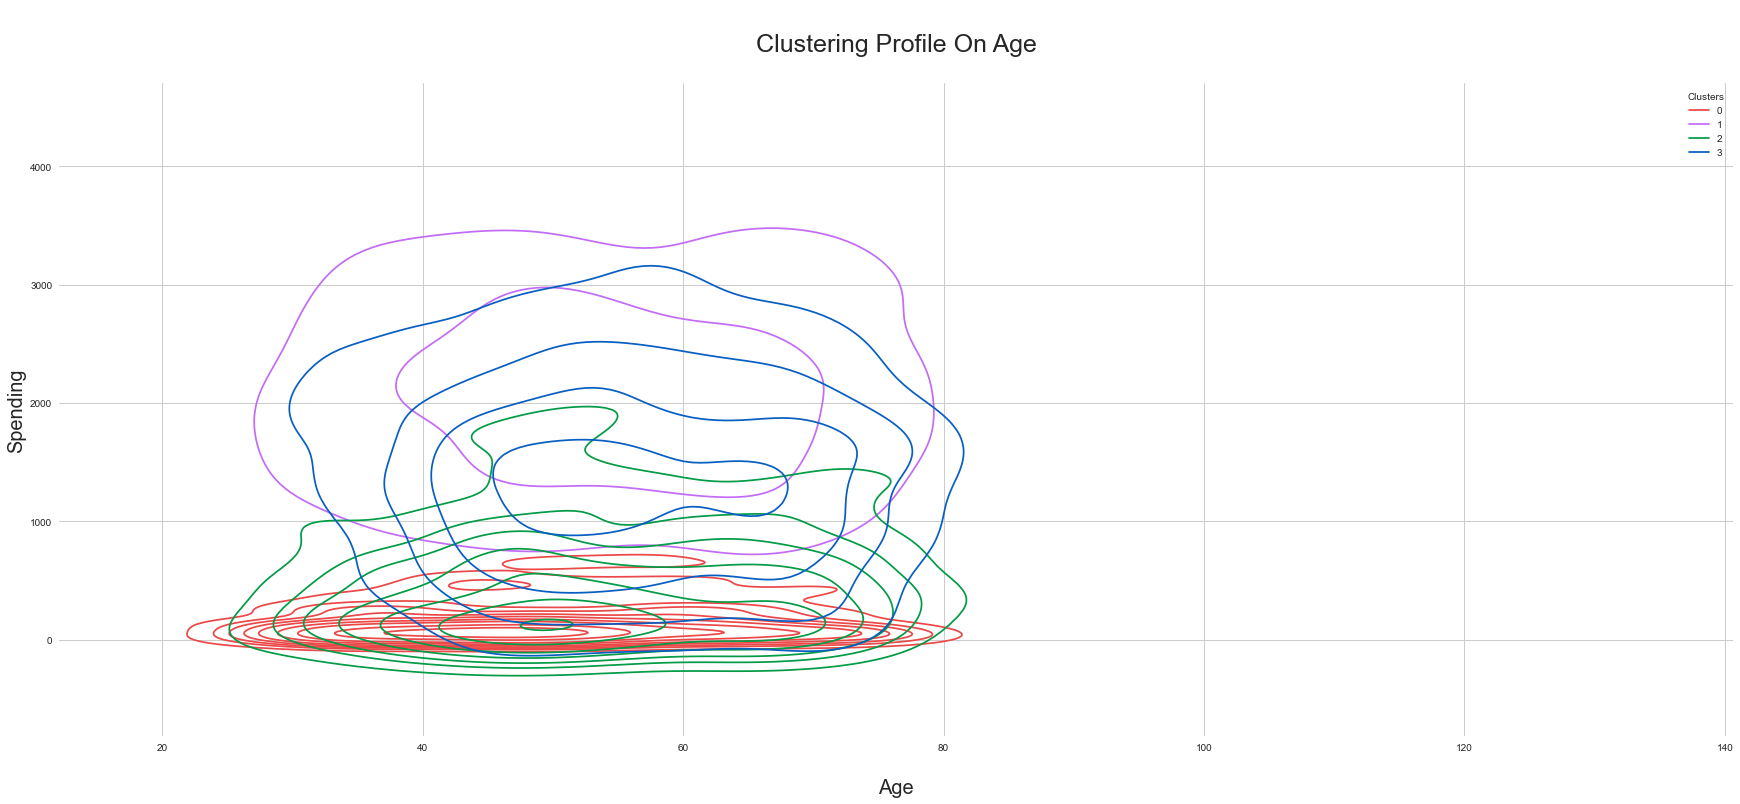

In [169]:
#cluster comparison of total item spending with their Age
density_cluster("Age")

**Insights:**

* Most of the customers of cluster 0 have age range in between 25 to 60. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 have age range in between 40 to 70. Their spending range is in between 1000 to 3200.
* Most of the customers of cluster 2 have age range in between 30 to 75. Their spending range is in between 0 to 1500.
* Most of the customers of cluster 3 have age range in between 40 to 75. Their spending range is in between 500 to 2500.

##### total item spending X Marital Status

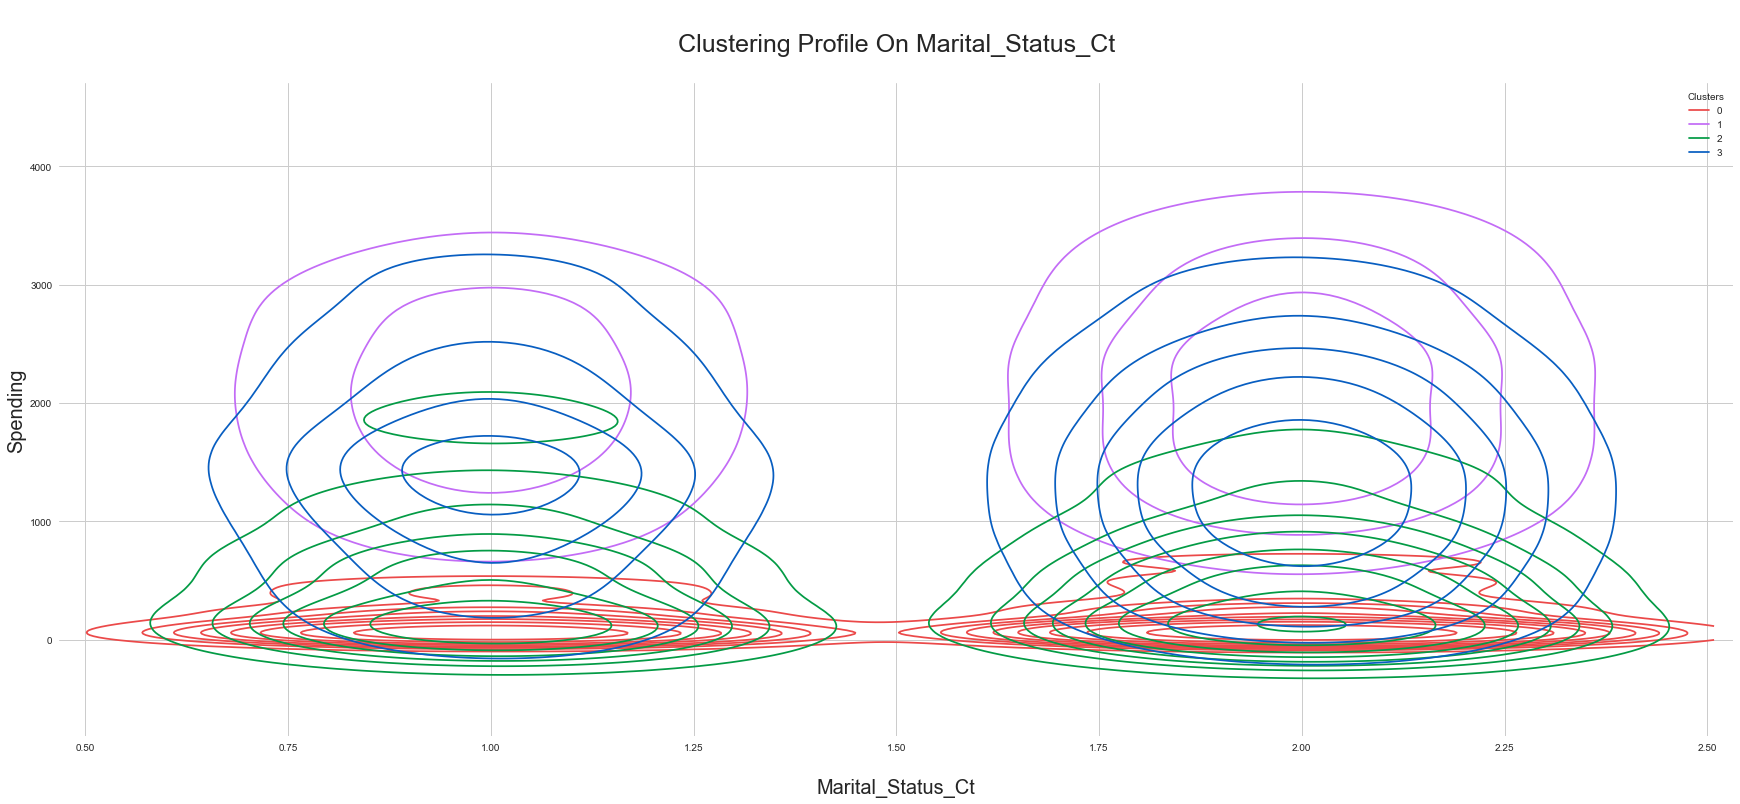

In [170]:
#cluster comparison of total item spending with their Marital Status
density_cluster("Marital_Status_Ct")

**Insights:**

1. Single or Divorcee or Widowed: 1
2. Married or Together: 2

* Some customers of cluster 0 are married and some are single. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 are married. Their spending range is in between 1000 to 3200.
* Most of the customers of cluster 2 are married. Their spending range is in between 0 to 1500.
* Some customers of cluster 3 are married and some are single. Their spending range is in between 500 to 2500.

##### total item spending X Parental Status

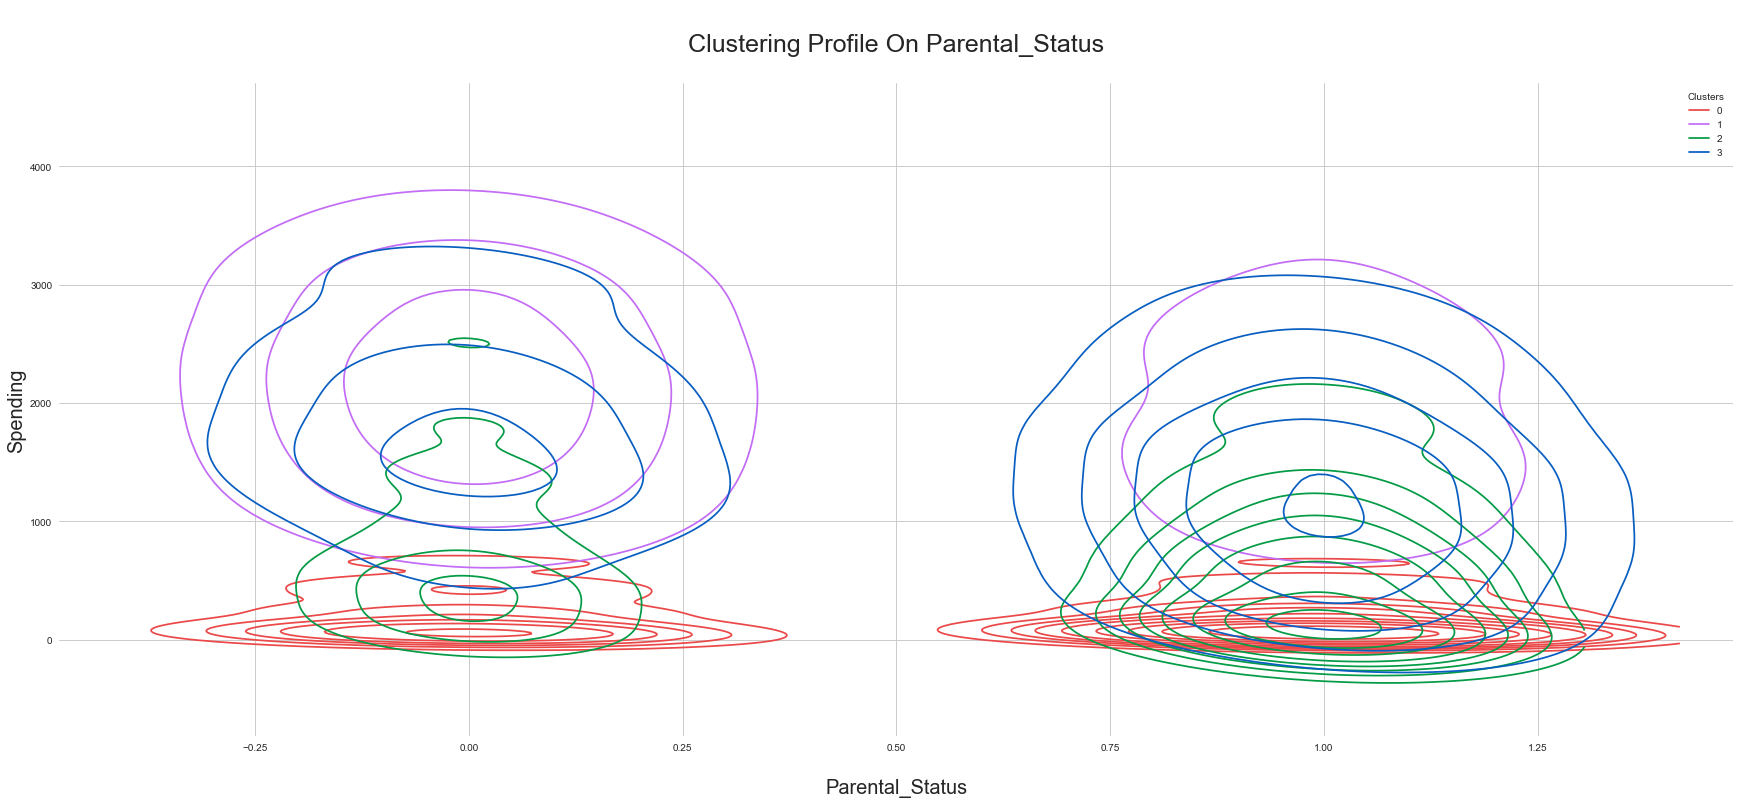

In [173]:
#cluster comparison of total item spending with their Parental Status i.e., they have kids in the household

#we will make a column to store their parental status
customer_data_treatment["Parental_Status"] = np.where(customer_data_treatment["Num_Kids"] > 0, 1, 0)

density_cluster("Parental_Status")

**Insights:**

1. Parents: 1
2. Not Parents: 0

* Most of the customers of cluster 0 are parents and very few are not parents. Their spending range is in between 0 to 800.
* Majority of the customers of cluster 1 are not parents. Their spending range is in between 1000 to 3200.
* Majority of the customers of cluster 2 are parents. Their spending range is in between 0 to 1500.
* Majority of the customers of cluster 3 are parents. Their spending range is in between 500 to 2500.

##### total item spending X Customer Loyalty i.e. their days of joining

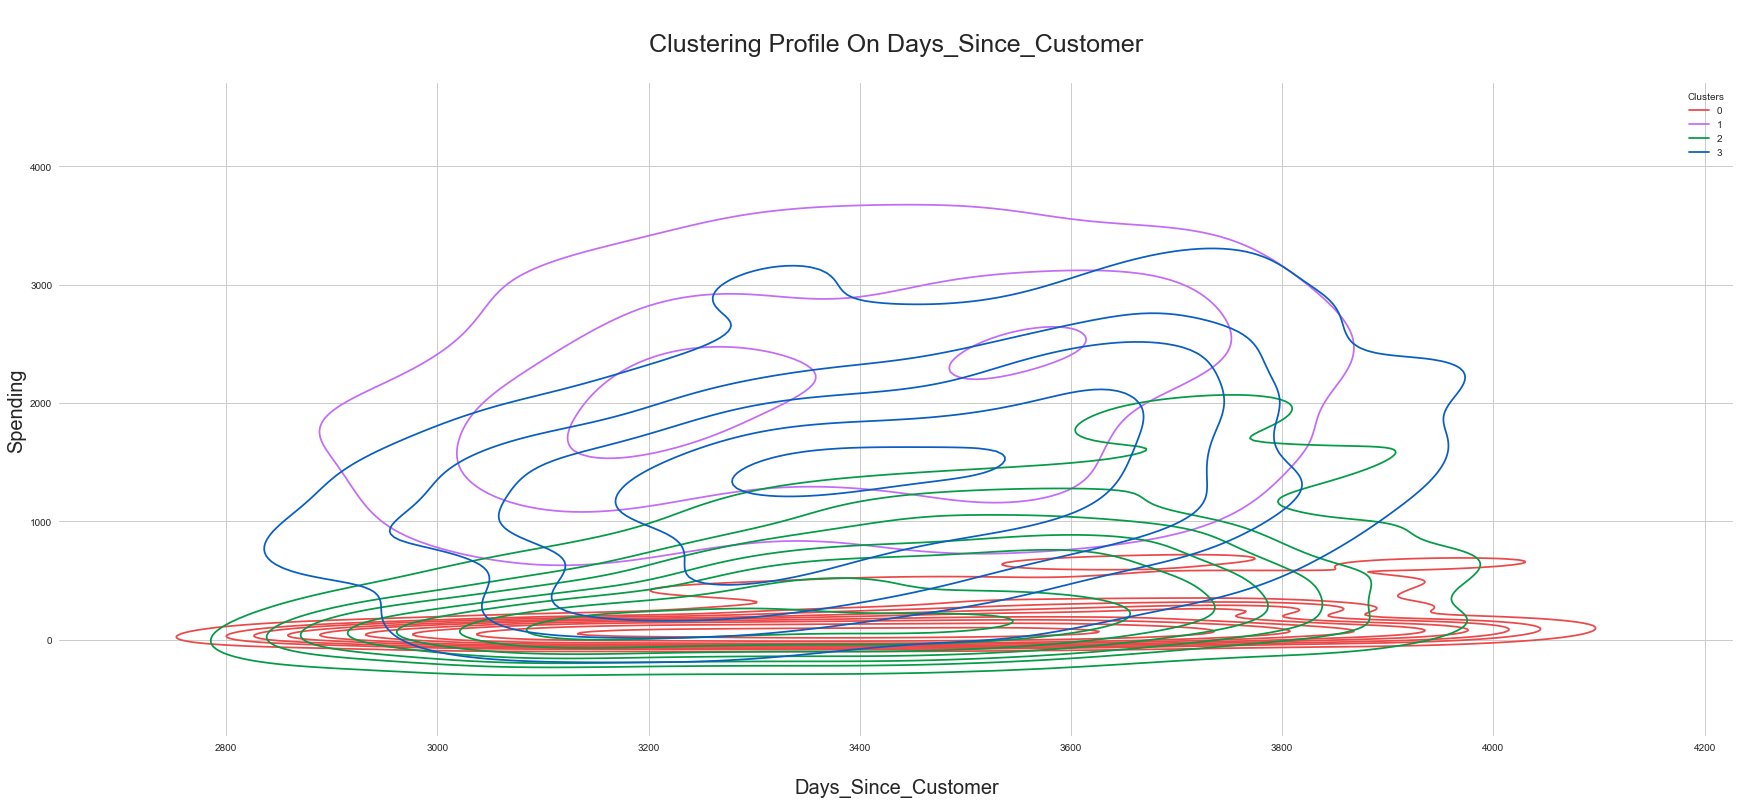

In [174]:
#cluster comparison of total item spending with their days of joining
density_cluster("Days_Since_Customer")

**Insights:**

* Most of the customers of cluster 0 are customer for 3000 to 3800 days. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 are customer for 3200 to 3400 days. Their spending range is in between 1000 to 3200.
* Most of the customers of cluster 2 are customer for 3000 to 3800 days. Their spending range is in between 0 to 1500.
* Most of the customers of cluster 3 are customer for 3300 to 3500 days. Their spending range is in between 500 to 2500.

## Cluster Profiles

### Cluster 0

* Income range is in between 1000 to 40000 and spending range is in between 0 to 800
* Age range in between 25 to 60
* From any educational level
* Can be married and unmarried as well
* Most of them are parents
* Some have at most child
* Customer for at least 3000 days

### Cluster 1

* Income range is in between 70000 to 100000 and spending range is in between 1000 to 3200
* Age range in between 40 to 70
* Almost all have completed graduation
* Most of them are married
* They do not have any children
* Have at most one child, majority have no child.
* Customer for at least 3200 days

### Cluster 2

* Income range is in between 30000 to 50000 and spending range is in between 0 to 1500
* Age range in between 30 to 75
* Almost all have completed graduation
* Can be married and unmarried as well
* Majority of them are parents
* All have children, most have one or two children
* Customer for at least 3000  days

### Cluster 3

* Income range is in between 50000 to 70000 and spending range is in between 500 to 2500
* Age range in between 40 to 75
* Almost all have completed graduation
* Most of them are married
* Most of them are parents
* All have children, most have one child
* Customer for at least 3300 days

# Improvements

* We can use PCA to further Kmeans clustering and which can also help us in handling any form of outliers that we are seeing within the clusters.